In [1]:
#importing the necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataframe
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [89]:
df.shape

(99457, 10)

DEFINING THE PROBLEM STATEMENT
How can we increase the sales of clothing in the mall thats having the least amount of sales when it comes to selling clothes 
Predict the sales for 2024/2025 for that mall

# DATA CLEANING


In [3]:
#dropping duplicates
df.loc[df.duplicated()]
df.drop_duplicates(inplace=True)
#no duplicates found

In [4]:
#identifying null values
df.isnull().sum()  # there are no null values

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
#dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [6]:
#converting invoice date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_date'].head(3)

0   2022-05-08
1   2021-12-12
2   2021-09-11
Name: invoice_date, dtype: datetime64[ns]

In [7]:
df['invoice_date'].dtype

dtype('<M8[ns]')

In [8]:
#Analyzing the invoice no
def check_invoice_no(series):
    condition = series.apply(lambda x : x.startswith("I") and x[1:].isdigit() and len(x) == 7)
    
    return condition.all()
result = check_invoice_no(df['invoice_no'])
result

True

In [9]:
#Analyzing customer_id
def check_customer_id(series):
    condition = series.apply(lambda x : x.startswith("C") and x[1:].isdigit() and len(x) == 7)
    
    return condition.all()
result = check_customer_id(df['customer_id'])
result

True

In [10]:
#focus is on clothing
cloth_df = df.loc[df['category'] == 'Clothing']
cloth_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity


<Axes: >

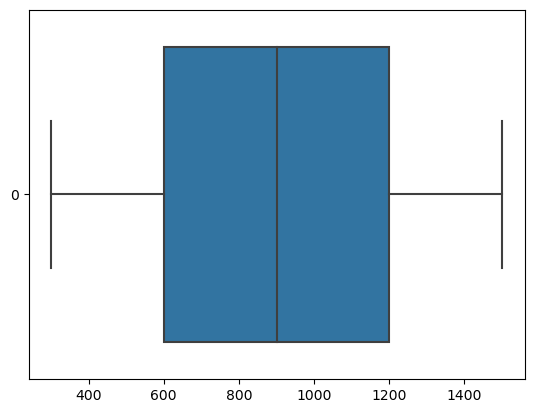

In [11]:
#identify outliers
sns.boxplot(cloth_df['price'],orient='h')

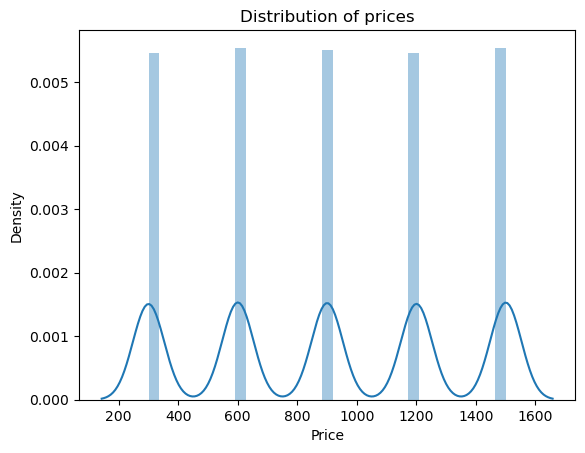

In [115]:
sns.distplot(cloth_df['price']) #the distribution of the sale of clothes is periodic
plt.xlabel('Price')
plt.ylabel('Density')
plt.title("Distribution of prices")

plt.savefig('dist.png', bbox_inches='tight')
plt.show()

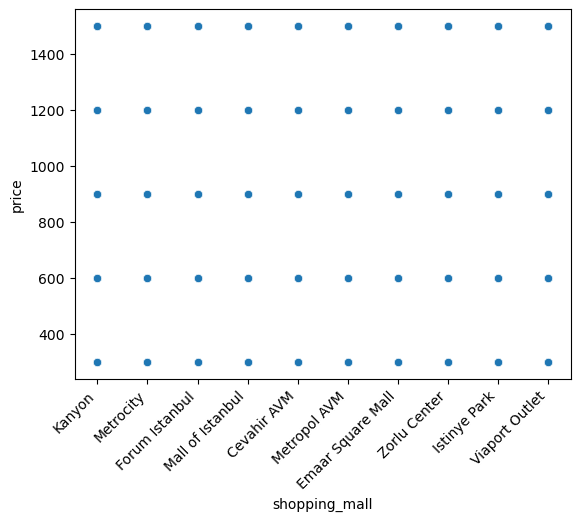

In [13]:
sns.scatterplot(x=cloth_df['shopping_mall'],y=cloth_df['price'],data=cloth_df)
plt.xticks(rotation = 45,ha='right')
plt.show()  # there are no outliers but the prices are being sold at similar prices in all the malls

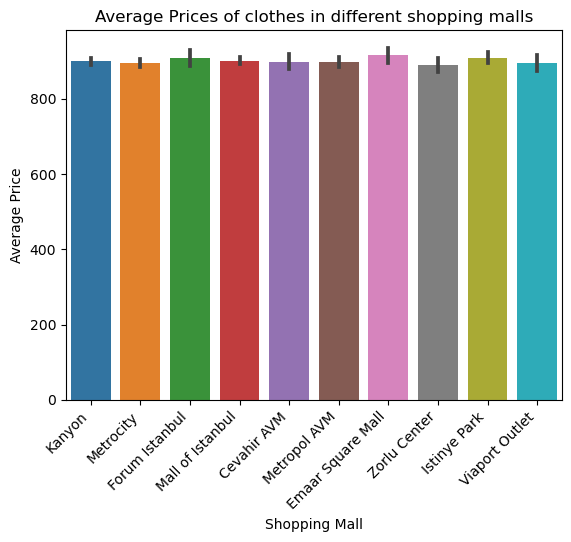

In [100]:
ax = sns.barplot(x = cloth_df['shopping_mall'],y = cloth_df['price'])
plt.xticks(rotation =45,ha='right')
plt.xlabel('Shopping Mall')
plt.ylabel('Average Price')
plt.title("Average Prices of clothes in different shopping malls")

plt.savefig('average_price.png', bbox_inches='tight')
plt.show()

In [96]:
import os
os.getcwd()


'C:\\Users\\user\\Data Analysis 1'

In [14]:
#which mall is making the least sales 
cloth_df.groupby('shopping_mall')['price'].sum()

shopping_mall
Cevahir AVM          1554414.40
Emaar Square Mall    1511803.04
Forum Istanbul       1572119.12
Istinye Park         3050313.20
Kanyon               6155541.04
Mall of Istanbul     6245565.04
Metrocity            4719958.32
Metropol AVM         3166444.16
Viaport Outlet       1530708.08
Zorlu Center         1568818.24
Name: price, dtype: float64

In [61]:
cloth_df['year'] = cloth_df['invoice_date'].dt.year
cloth_df['month'] = cloth_df['invoice_date'].dt.month
cloth_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,2022,5
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,2021,1
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2021,4


In [104]:
mall_sales = pd.pivot_table(index='shopping_mall',values = 'price',aggfunc='sum',data=cloth_df)
mall_sales.reset_index(inplace=True)
mall_sales

,shopping_mall,price
0,Cevahir AVM,1554414.40
1,Emaar Square Mall,1511803.04
2,Forum Istanbul,1572119.12
3,Istinye Park,3050313.20
4,Kanyon,6155541.04
5,Mall of Istanbul,6245565.04
6,Metrocity,4719958.32
7,Metropol AVM,3166444.16
8,Viaport Outlet,1530708.08
9,Zorlu Center,1568818.24


In [63]:
total_sales = pd.pivot_table(index='shopping_mall',columns = ['gender','year'],values='price',aggfunc='sum',data=cloth_df)
total_sales.reset_index(inplace=True)
# total_sales.sort_values(by='price',ascending = True)
total_sales

gender      shopping_mall      Female                               Male  \
year                             2021        2022       2023        2021   
0             Cevahir AVM   455221.36   390104.00   82221.92   299479.84   
1       Emaar Square Mall   394605.20   401206.96   64517.20   300980.24   
2          Forum Istanbul   430314.72   448919.68   81921.84   286876.48   
3            Istinye Park   856428.32   862129.84  146138.96   523339.52   
4                  Kanyon  1700553.36  1723659.52  318684.96  1148406.16   
5        Mall of Istanbul  1783975.60  1638136.72  304581.20  1093791.60   
6               Metrocity  1304747.84  1286142.88  230461.44   906841.76   
7            Metropol AVM   863330.16   867831.36  165644.16   606161.60   
8          Viaport Outlet   425213.36   408108.80   71719.12   284475.84   
9            Zorlu Center   400906.88   422212.56   87023.20   299479.84   

gender                         
year          2022       2023  
0        276073.60   51313.68  
1        294678.56   55814.88  
2        273072.80   51013.60  
3        550946.88  111329.68  
4       1055681.44  208555.60  
5       1190117.28  234962.64  
6        827620.64  164143.76  
7        560249.36  103227.52  
8        292878.08   48312.88  
9        300680.16   58515.60

In [71]:
#flattening the multilevel dataframe 
flatten_cloth_df = total_sales.copy()
flatten_cloth_df.columns = [' '.join(map(str, col)).strip() for  col in flatten_cloth_df.columns.values]
flatten_cloth_df.reset_index(inplace=True)
flatten_cloth_df.head()

,index,shopping_mall,Female 2021,Female 2022,Female 2023,Male 2021,Male 2022,Male 2023
0,0,Cevahir AVM,455221.36,390104.00,82221.92,299479.84,276073.60,51313.68
1,1,Emaar Square Mall,394605.20,401206.96,64517.20,300980.24,294678.56,55814.88
2,2,Forum Istanbul,430314.72,448919.68,81921.84,286876.48,273072.80,51013.60
3,3,Istinye Park,856428.32,862129.84,146138.96,523339.52,550946.88,111329.68
4,4,Kanyon,1700553.36,1723659.52,318684.96,1148406.16,1055681.44,208555.60


In [76]:
year_2021 = [col for col in flatten_cloth_df.columns if '2021' in col]
year_2022 = [col for col in flatten_cloth_df.columns if '2022' in col]
year_2023 = [col for col in flatten_cloth_df.columns if '2023' in col]

total_sales_df = pd.DataFrame({
    'shopping_mall': flatten_cloth_df['shopping_mall'],
    'year_2021': flatten_cloth_df[year_2021].sum(axis=1),
    'year_2022': flatten_cloth_df[year_2022].sum(axis=1),
    'year_2023': flatten_cloth_df[year_2023].sum(axis=1),

})
total_sales_df

,shopping_mall,year_2021,year_2022,year_2023
0,Cevahir AVM,754701.20,666177.60,133535.60
1,Emaar Square Mall,695585.44,695885.52,120332.08
2,Forum Istanbul,717191.20,721992.48,132935.44
3,Istinye Park,1379767.84,1413076.72,257468.64
4,Kanyon,2848959.52,2779340.96,527240.56
5,Mall of Istanbul,2877767.20,2828254.00,539543.84
6,Metrocity,2211589.60,2113763.52,394605.20
7,Metropol AVM,1469491.76,1428080.72,268871.68
8,Viaport Outlet,709689.20,700986.88,120032.00
9,Zorlu Center,700386.72,722892.72,145538.80


In [79]:
total_sales_df['total_sales'] = total_sales_df[['year_2021', 'year_2022', 'year_2023']].sum(axis=1)
total_sales_df.head()

,shopping_mall,year_2021,year_2022,year_2023,total_sales
0,Cevahir AVM,754701.20,666177.60,133535.60,1554414.40
1,Emaar Square Mall,695585.44,695885.52,120332.08,1511803.04
2,Forum Istanbul,717191.20,721992.48,132935.44,1572119.12
3,Istinye Park,1379767.84,1413076.72,257468.64,3050313.20
4,Kanyon,2848959.52,2779340.96,527240.56,6155541.04


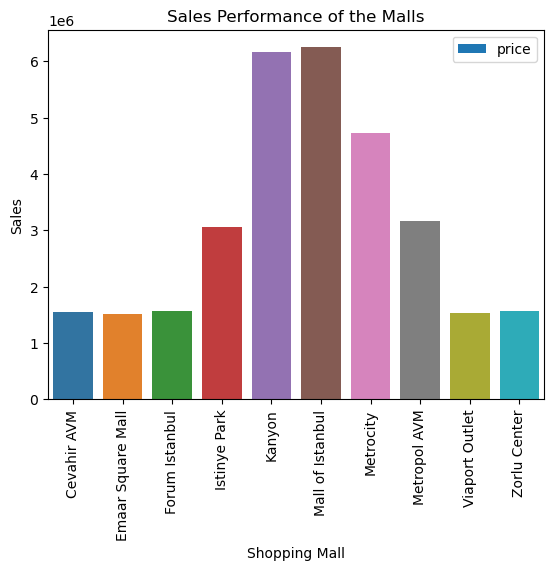

In [109]:
mall_sales.plot(kind='bar')
sns.barplot(x = 'shopping_mall',y='price',data=mall_sales)
plt.xlabel('Shopping Mall')
plt.ylabel('Sales')
plt.title('Sales Performance of the Malls')
plt.savefig('sales.png', bbox_inches='tight')
plt.show()

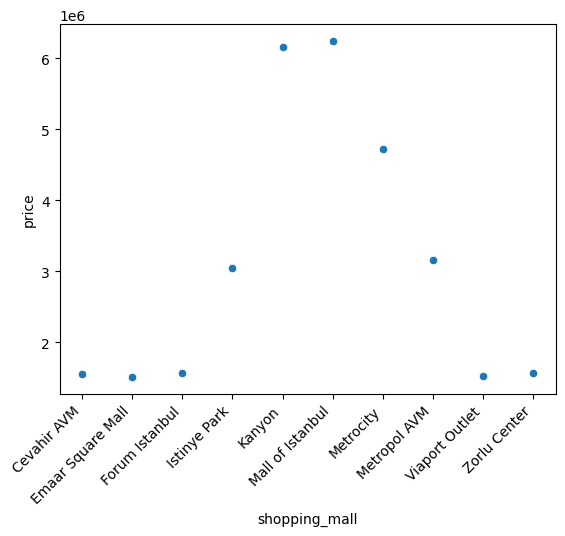

In [19]:
sns.scatterplot(x=total_sales['shopping_mall'],y=total_sales['price'],data=total_sales)
plt.xticks(rotation = 45,ha='right')
plt.show() #have a relationship that follows a linear relationship

In [74]:
#evaluating the qauntities
total_quantity = pd.pivot_table(index='shopping_mall',aggfunc='sum',values ='quantity',data=cloth_df,columns =['gender','year'])
# total_quantity.reset_index(inplace=True)
# total_quantity.sort_values(by='quantity',ascending=True)
total_quantity
#might be that Emaar Square mall was selling less because they were selling less quantity

gender            Female              Male           
year                2021  2022  2023  2021  2022 2023
shopping_mall                                        
Cevahir AVM         1517  1300   274   998   920  171
Emaar Square Mall   1315  1337   215  1003   982  186
Forum Istanbul      1434  1496   273   956   910  170
Istinye Park        2854  2873   487  1744  1836  371
Kanyon              5667  5744  1062  3827  3518  695
Mall of Istanbul    5945  5459  1015  3645  3966  783
Metrocity           4348  4286   768  3022  2758  547
Metropol AVM        2877  2892   552  2020  1867  344
Viaport Outlet      1417  1360   239   948   976  161
Zorlu Center        1336  1407   290   998  1002  195

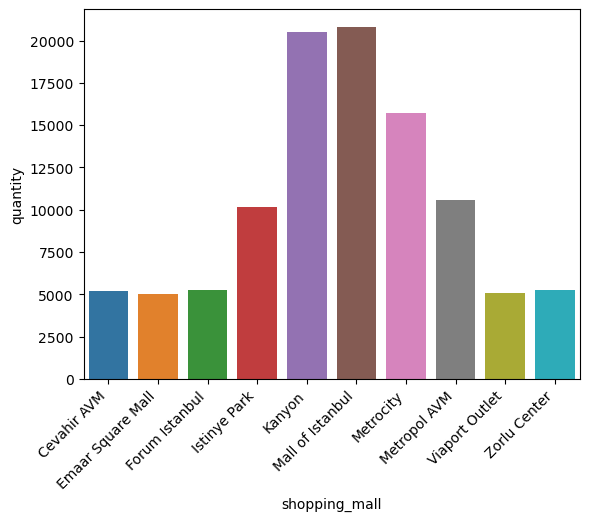

In [21]:
sns.barplot(x = 'shopping_mall',y='quantity',data=total_quantity)
plt.xticks(rotation = 45,ha='right')
plt.show()

In [22]:
#sales and age
emaar_df = cloth_df.loc[cloth_df['shopping_mall'] == 'Emaar Square Mall']
emaar_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall
31,I331891,C501658,Male,23,Clothing,1,300.08,Credit Card,2021-11-21,Emaar Square Mall
125,I273890,C891545,Female,41,Clothing,3,900.24,Debit Card,2021-08-26,Emaar Square Mall
163,I222086,C978718,Male,37,Clothing,5,1500.40,Cash,2023-09-02,Emaar Square Mall
242,I165461,C230766,Female,25,Clothing,1,300.08,Credit Card,2022-01-11,Emaar Square Mall
...,...,...,...,...,...,...,...,...,...,...
99216,I322506,C500090,Female,27,Clothing,4,1200.32,Credit Card,2021-05-24,Emaar Square Mall
99268,I319063,C174663,Female,66,Clothing,5,1500.40,Credit Card,2022-10-20,Emaar Square Mall
99378,I272020,C135499,Female,46,Clothing,4,1200.32,Cash,2021-04-22,Emaar Square Mall
99385,I484380,C293542,Female,41,Clothing,4,1200.32,Debit Card,2022-11-23,Emaar Square Mall


In [23]:
emaar_df.groupby('age')['price'].sum().idxmax()

38

In [24]:
emaar_df.groupby('age')['price'].sum().idxmin()

69

<Axes: xlabel='age', ylabel='price'>

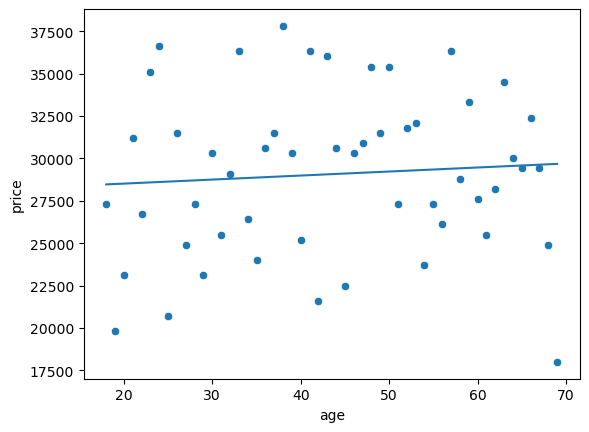

In [25]:
from scipy.stats import linregress
emaar_sales = pd.pivot_table(index='age',values='price',aggfunc='sum',data=emaar_df)
emaar_sales.reset_index(inplace=True)
emaar_sales
#y = mx + c
m,intercept,rv,pv,stderr = linregress(emaar_sales['age'],emaar_sales['price'])
x = emaar_sales['age']
y = m * x + intercept
plt.plot(x,y)
sns.scatterplot(x='age',y='price',data=emaar_sales)

<Axes: >

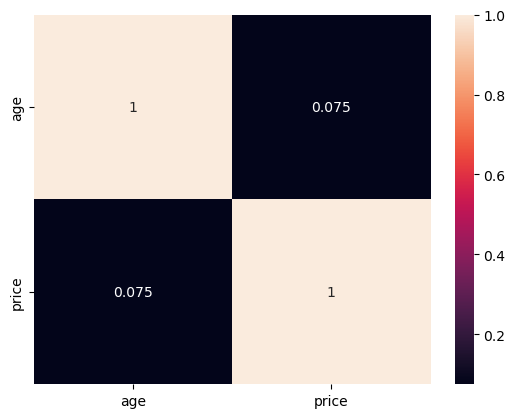

In [26]:
sns.heatmap(emaar_sales.corr(),annot=True)

In [27]:
emaar_df.groupby('gender')['price'].sum() # highest amount of sales came from women in emmar_mall

gender
Female    860329.36
Male      651473.68
Name: price, dtype: float64

In [28]:
emaar_df['invoice_date'].dtype

dtype('<M8[ns]')

In [29]:
emaar_df['year'] = emaar_df['invoice_date'].dt.year
emaar_df['year']

20       2023
31       2021
125      2021
163      2023
242      2022
         ... 
99216    2021
99268    2022
99378    2021
99385    2022
99435    2022
Name: year, Length: 1651, dtype: int64

In [30]:
emaar_df['month'] = emaar_df['invoice_date'].dt.month
emaar_df['month']

20        2
31       11
125       8
163       9
242       1
         ..
99216     5
99268    10
99378     4
99385    11
99435     2
Name: month, Length: 1651, dtype: int64

In [31]:
emaar_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall,2023,2
31,I331891,C501658,Male,23,Clothing,1,300.08,Credit Card,2021-11-21,Emaar Square Mall,2021,11
125,I273890,C891545,Female,41,Clothing,3,900.24,Debit Card,2021-08-26,Emaar Square Mall,2021,8
163,I222086,C978718,Male,37,Clothing,5,1500.40,Cash,2023-09-02,Emaar Square Mall,2023,9
242,I165461,C230766,Female,25,Clothing,1,300.08,Credit Card,2022-01-11,Emaar Square Mall,2022,1


In [32]:
emaar_df.groupby('year')['price'].sum()

year
2021    695585.44
2022    695885.52
2023    120332.08
Name: price, dtype: float64

In [33]:
emaar_df.groupby('year')['price'].sum().idxmax()

2022

In [34]:
emaar_df.groupby('year')['price'].sum().idxmin()

2023

In [35]:
emaar_df.groupby('month')['price'].sum()
pd.pivot_table(index = 'month',values = 'price',aggfunc='sum',data=emaar_df).plot(kind'bar')

SyntaxError: invalid syntax (48655510.py, line 2)

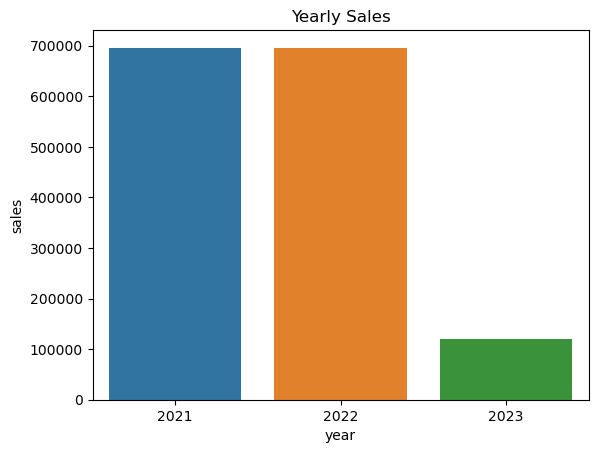

In [113]:
yearly_sales = pd.pivot_table(index='year',values='price',aggfunc='sum',data=emaar_df)
yearly_sales.reset_index(inplace=True)
sns.barplot(x='year',y='price',data=yearly_sales)
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Yearly Sales')
plt.savefig('yearsales.png', bbox_inches='tight')
plt.show()

In [37]:
emaar_df.groupby('payment_method')['category'].count()

payment_method
Cash           731
Credit Card    567
Debit Card     353
Name: category, dtype: int64

In [ ]:
#creating the model
#the features are:


In [38]:
pd.pivot_table(index = 'year',columns ='gender',values = 'price',aggfunc='sum',data=emaar_df)

gender,Female,Male
year,,
2021,394605.20,300980.24
2022,401206.96,294678.56
2023,64517.20,55814.88


In [80]:
total_sales_df.head()

,shopping_mall,year_2021,year_2022,year_2023,total_sales
0,Cevahir AVM,754701.20,666177.60,133535.60,1554414.40
1,Emaar Square Mall,695585.44,695885.52,120332.08,1511803.04
2,Forum Istanbul,717191.20,721992.48,132935.44,1572119.12
3,Istinye Park,1379767.84,1413076.72,257468.64,3050313.20
4,Kanyon,2848959.52,2779340.96,527240.56,6155541.04


In [83]:
for mall in total_sales_df['shopping_mall']:
    print(mall)

Cevahir AVM
Emaar Square Mall
Forum Istanbul
Istinye Park
Kanyon
Mall of Istanbul
Metrocity
Metropol AVM
Viaport Outlet
Zorlu Center


In [87]:
mall_mapping = {
    'Cevahir AVM': 0,
    'Emaar Square Mall': 1,
    'Forum Istanbul': 2,
    'Istinye Park': 3,
    'Kanyon': 4,
    'Mall of Istanbul': 5,
    'Metrocity': 6,
    'Metropol AVM': 7,
    'Viaport Outlet': 8,
    'Zorlu Center': 9
}
total_sales_df['shopping_mall_encoded'] = total_sales_df['shopping_mall'].map(mall_mapping)
total_sales_df

,shopping_mall,year_2021,year_2022,year_2023,total_sales,shopping_mall_encoded
0,Cevahir AVM,754701.20,666177.60,133535.60,1554414.40,0
1,Emaar Square Mall,695585.44,695885.52,120332.08,1511803.04,1
2,Forum Istanbul,717191.20,721992.48,132935.44,1572119.12,2
3,Istinye Park,1379767.84,1413076.72,257468.64,3050313.20,3
4,Kanyon,2848959.52,2779340.96,527240.56,6155541.04,4
5,Mall of Istanbul,2877767.20,2828254.00,539543.84,6245565.04,5
6,Metrocity,2211589.60,2113763.52,394605.20,4719958.32,6
7,Metropol AVM,1469491.76,1428080.72,268871.68,3166444.16,7
8,Viaport Outlet,709689.20,700986.88,120032.00,1530708.08,8
9,Zorlu Center,700386.72,722892.72,145538.80,1568818.24,9


In [ ]:
#splitting the data
X = total_sales_df[['shopping_mall_encoded','year_2021','year_2022','year_2023']]

In [ ]:
y = total_sales_df['total_sales']

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split